In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [7]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [9]:
type(diabetes)

sklearn.utils.Bunch

In [11]:
print(diabetes.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [12]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [13]:
diabetes = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [14]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [15]:
corr = diabetes.corr()
print (corr)

          age       sex       bmi        bp        s1        s2        s3  \
age  1.000000  0.173737  0.185085  0.335427  0.260061  0.219243 -0.075181   
sex  0.173737  1.000000  0.088161  0.241013  0.035277  0.142637 -0.379090   
bmi  0.185085  0.088161  1.000000  0.395415  0.249777  0.261170 -0.366811   
bp   0.335427  0.241013  0.395415  1.000000  0.242470  0.185558 -0.178761   
s1   0.260061  0.035277  0.249777  0.242470  1.000000  0.896663  0.051519   
s2   0.219243  0.142637  0.261170  0.185558  0.896663  1.000000 -0.196455   
s3  -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455  1.000000   
s4   0.203841  0.332115  0.413807  0.257653  0.542207  0.659817 -0.738493   
s5   0.270777  0.149918  0.446159  0.393478  0.515501  0.318353 -0.398577   
s6   0.301731  0.208133  0.388680  0.390429  0.325717  0.290600 -0.273697   

           s4        s5        s6  
age  0.203841  0.270777  0.301731  
sex  0.332115  0.149918  0.208133  
bmi  0.413807  0.446159  0.388680  
bp   0.2

<AxesSubplot:>

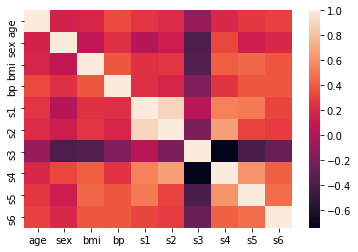

In [16]:
sns.heatmap(corr, 
           xticklabels = corr.columns, 
           yticklabels = corr.columns)

diabetes.dropna(inplace = True)

In [24]:
train_df = diabetes[:650]
test_df = diabetes[650:750]

In [25]:
trainLabel = np.asarray(train_df['s3'])
trainData = np.asarray(train_df.drop('s3', 1))
testLabel = np.asarray(test_df['s3'])
testData = np.asarray(test_df.drop('s3', 1))

In [26]:
means = np.mean(trainData, axis = 0)
stds = np.std(trainData, axis = 0)

trainData = (trainData - means)/stds
testDatat = (testData - means)/stds

In [27]:
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

ValueError: Unknown label type: 'continuous'

In [23]:
sccuracy = diabetesCheck.score(testData, testLabel)
print("accuracy = ", accuracy)

ValueError: Found array with 0 sample(s) (shape=(0, 9)) while a minimum of 1 is required.